# Geometric Intution + General matchings

In this notebook, we visit an example where we explore the geometric interpretation of the block function in dimension 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import matplotlib as mpl

import tdqual.topological_data_quality_0 as tdq
plots_dir = "plots/geom_interpretation/"

import os 
os.makedirs(plots_dir, exist_ok=True)

Create a pair $X \subseteq Y$ such that it leads to an interesting matching.

In [2]:
Z = []
Z = [[0,0], [1,0], [3,0]]
X_indices = [0,1,2]
for idx in range(1, 20):
    if idx ==10:
        continue
    angle = np.pi * (1 + idx/20)
    Z.append([1.5 + 1.5*np.cos(angle), 1.5*np.sin(angle)])
# Next, add further points 
Z += [[1+0.2*i, 0] for i in range(1,7)]
Z = np.array(Z)

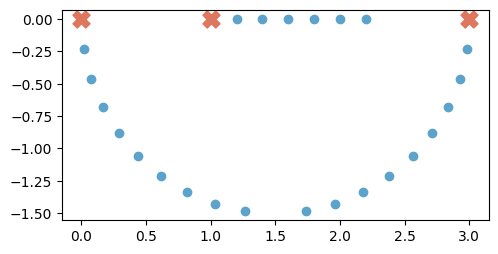

In [7]:
fig, ax = plt.subplots(figsize=(5,3))
X = Z[X_indices]
ax.scatter(Z[:,0], Z[:,1], color=mpl.colormaps["RdBu"](1/1.3), zorder=1)
ax.scatter(X[:,0], X[:,1], color=mpl.colormaps["RdBu"](0.3/1.3), zorder=2, marker="X", s=150)
ax.set_aspect("equal")
fig.tight_layout()
plt.savefig(f"{plots_dir}/points_example.png")

Now, we are ready to compute the block function $\textrm{PH}_0(X)\rightarrow \textrm{PH}_0(Y)$

In [8]:
filtration_list_X, pairs_arr_X = tdq.mst_edge_filtration(X) # MST(X)
filtration_list_Z, pairs_arr_Z = tdq.mst_edge_filtration(Z) # MST(Z)
# TMT
TMT_X_pairs = tdq.compute_tmt_pairs(filtration_list_X, pairs_arr_X)
TMT_Z_pairs = tdq.compute_tmt_pairs(filtration_list_Z, pairs_arr_Z)
indices_X_Z = np.max(TMT_Z_pairs, axis=1)<X.shape[0]
TMT_X_Z_pairs = TMT_Z_pairs[indices_X_Z]
indices_X_Z = np.nonzero(indices_X_Z)[0]
FX = tdq.get_inclusion_matrix(TMT_X_pairs, TMT_X_Z_pairs) # Associated matrix
matchingX = tdq.get_inclusion_matrix_pivots(FX, Z.shape[0]) # Matching in TMT_X_Z
matching =[indices_X_Z[i] for i in matchingX] # Matching in all TMT_Z
# Arrays for filtrations 
filt_X = np.array(filtration_list_X)
filt_Z = np.array(filtration_list_Z)

Now, we plot the matching using a geometric intuition.

In [9]:
from importlib import reload

from tdqual.geometric import plot_geometric_matching

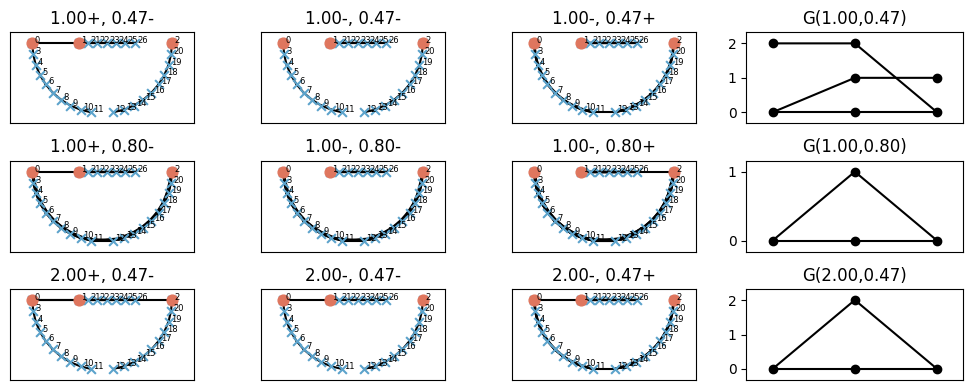

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10,4))
for idx, pair_ab in enumerate([[0,24], [0,25],[1,24]]):
    a = filt_X[pair_ab[0]]
    b = filt_Z[pair_ab[1]]
    plot_geometric_matching(a, b, X_indices, Z, filt_X, filt_Z, pairs_arr_X, pairs_arr_Z, ax[idx], labelsize=6)
plt.tight_layout()
plt.savefig(f"{plots_dir}/matching_geometric_half_circle.png")

Next, we consider a more general example, where we consider two metric spaces related by a common vertex set. We can do this with grayscale images.

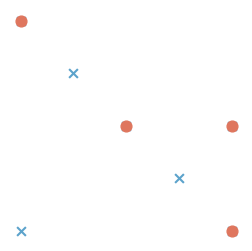

In [11]:
RandGen = np.random.default_rng(2)
# # Generate Random Sample
X = np.array([[0,4], [2,2], [4,0], [4,2]])
X_indices = list(range(4))
Z = np.array([[1,3], [3,1], [0,0]])
Z = np.vstack((X, Z))
np.savetxt("Z_example_new.txt", Z, fmt="%.4f")
np.savetxt("X_idx_example_new.txt", X_indices, fmt="%d")
# Load Z and X_indices from files 
Z = np.loadtxt("Z_example_new.txt")
X_indices = np.loadtxt("X_idx_example_new.txt", dtype="int")
X = Z[X_indices]
# Plot point cloud
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
ax.scatter(X[:,0], X[:,1], color=mpl.colormaps["RdBu"](0.3/1.3), s=60, marker="o", zorder=2)
ax.scatter(Z[:,0], Z[:,1], color=mpl.colormaps["RdBu"](1/1.3), s=40, marker="x", zorder=1)
ax.set_axis_off()
plt.savefig(plots_dir + "points_0.png")

In [12]:
filtration_list_X, pairs_arr_X = tdq.mst_edge_filtration(X) # MST(X)
filtration_list_Z, pairs_arr_Z = tdq.mst_edge_filtration(Z) # MST(Z)
# TMT
TMT_X_pairs = tdq.compute_tmt_pairs(filtration_list_X, pairs_arr_X)
TMT_Z_pairs = tdq.compute_tmt_pairs(filtration_list_Z, pairs_arr_Z)
indices_X_Z = np.max(TMT_Z_pairs, axis=1)<X.shape[0]
TMT_X_Z_pairs = TMT_Z_pairs[indices_X_Z]
indices_X_Z = np.nonzero(indices_X_Z)[0]
FX = tdq.get_inclusion_matrix(TMT_X_pairs, TMT_X_Z_pairs) # Associated matrix
matchingX = tdq.get_inclusion_matrix_pivots(FX, Z.shape[0]) # Matching in TMT_X_Z
matching =[indices_X_Z[i] for i in matchingX] # Matching in all TMT_Z
# Arrays for filtrations 
filt_X = np.array(filtration_list_X)
filt_Z = np.array(filtration_list_Z)

In [13]:
filt_X

array([2.        , 2.        , 2.82842712])

In [14]:
filt_Z

array([1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
       2.82842712])

In [15]:
matching

[np.int64(4), np.int64(3), np.int64(1)]

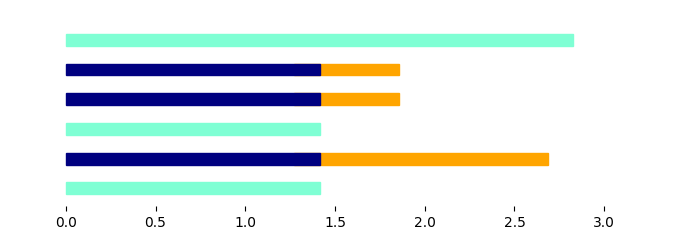

In [16]:
fig, ax = plt.subplots(figsize=(7,2.5))
tdq.plot_matching_0(filt_X, filt_Z, matching, ax)
plt.tight_layout()
plt.savefig(plots_dir + "block_matching_0.png")

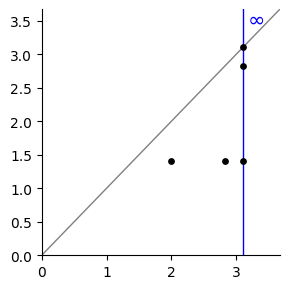

In [17]:
fig, ax = plt.subplots(figsize=(3,3))
D_f, multiplicities_f = tdq.compute_matching_diagram(filt_X, filt_Z, matching, _tol=1e-5)
tdq.plot_matching_diagram(D_f, ax)
plt.tight_layout()
plt.savefig(plots_dir + "matching_diagram_0.png")

In [18]:
D_f

array([[2.82842712, 1.41421356],
       [2.        , 1.41421356],
       [       inf, 2.82842712],
       [       inf, 1.41421356]])

In [19]:
multiplicities_f

[1, 2, 1, 2]

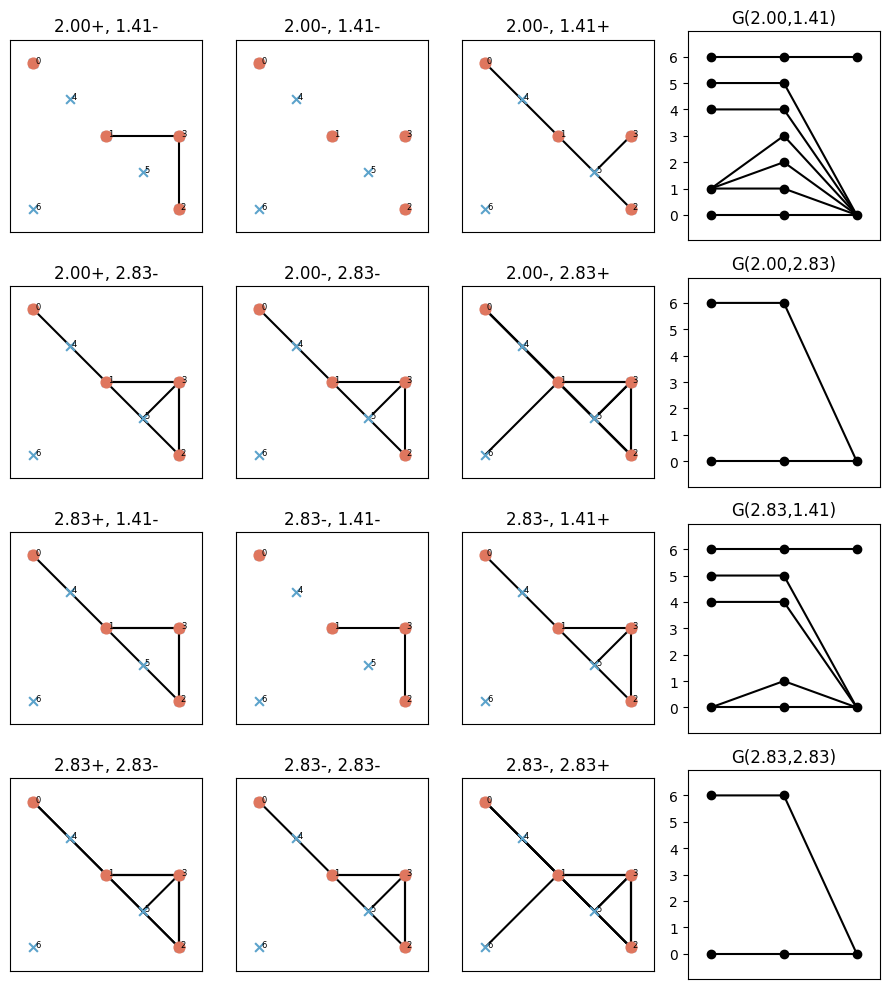

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(9,10))
for idx, pair_ab in enumerate([[0,0], [0,5], [2,0], [2,5]]):
    a = filt_X[pair_ab[0]]
    b = filt_Z[pair_ab[1]]
    plot_geometric_matching(a, b, X_indices, Z, filt_X, filt_Z, pairs_arr_X, pairs_arr_Z, ax[idx], labelsize=6)
plt.tight_layout()
plt.savefig(f"{plots_dir}/matching_geometric_example.png")

Now, we plot the stability diagram.

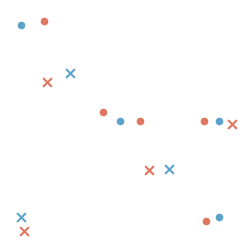

In [21]:
RandGen = np.random.default_rng(64)
eps=0.5
Z1_denoised = Z[list(range(len(X))) + [1,3] + list(range(len(X), len(Z)))]
# RandGen.uniform(0,eps, 8)
Z1 = Z1_denoised + tdq.sampled_circle(eps/2, eps, 9, RandGen)
Z1[3]=[3.7,2]
Z1[4]=[2.4,2]
X1 = Z1[range(5)]
# Plot point cloud
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
ax.scatter(X[:,0], X[:,1], color=mpl.colormaps["RdBu"](1/1.3), s=20, marker="o", zorder=2)
ax.scatter(Z[range(4,len(Z))][:,0], Z[range(4,len(Z))][:,1], color=mpl.colormaps["RdBu"](1/1.3), s=40, marker="x", zorder=2)
ax.scatter(X1[:,0], X1[:,1], color=mpl.colormaps["RdBu"](0.3/1.3), s=20, marker="o", zorder=1)
ax.scatter(Z1[range(5,len(Z1))][:,0], Z1[range(5,len(Z1))][:,1], color=mpl.colormaps["RdBu"](0.3/1.3), s=40, marker="x", zorder=1)
ax.set_axis_off()
plt.savefig(plots_dir + "points_noise_example.png")

Plot matching of points from Z and Z1

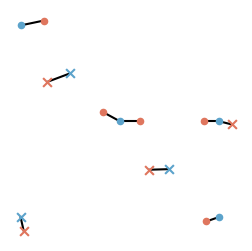

In [22]:
# Plot point cloud with matching
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
ax.scatter(X[:,0], X[:,1], color=mpl.colormaps["RdBu"](1/1.3), s=20, marker="o", zorder=2)
ax.scatter(Z[range(4,len(Z))][:,0], Z[range(4,len(Z))][:,1], color=mpl.colormaps["RdBu"](1/1.3), s=40, marker="x", zorder=2)
ax.scatter(X1[:,0], X1[:,1], color=mpl.colormaps["RdBu"](0.3/1.3), s=20, marker="o", zorder=1)
ax.scatter(Z1[range(5,len(Z1))][:,0], Z1[range(5,len(Z1))][:,1], color=mpl.colormaps["RdBu"](0.3/1.3), s=40, marker="x", zorder=1)
# Plot matching 
for start_pt, end_pt in zip(Z1_denoised, Z1):
    ax.plot([start_pt[0], end_pt[0]], [start_pt[1], end_pt[1]], c="black", linewidth=1.5, zorder=0.5)
ax.set_axis_off()
plt.savefig(plots_dir + "points_noise_example.png")

In [23]:
Z1_denoised

array([[0., 4.],
       [2., 2.],
       [4., 0.],
       [4., 2.],
       [2., 2.],
       [4., 2.],
       [1., 3.],
       [3., 1.],
       [0., 0.]])

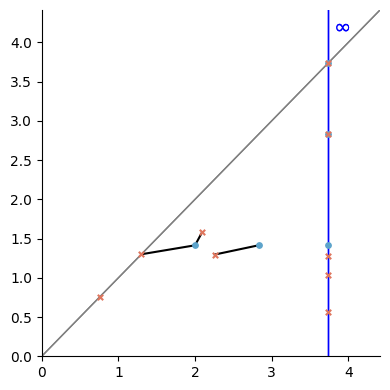

In [29]:
fig, ax = plt.subplots(figsize=(4,4))
filt_X1, filt_Z1, matching1 = tdq.compute_Mf_0(X1, Z1)
D_g, multiplicities_g = tdq.compute_matching_diagram(filt_X1, filt_Z1, matching1, _tol=1e-5)
lim_x = np.max([np.max(filt_X1), np.max(filt_X)])*1.2
tdq.plot_matching_diagram(D_f, ax, colorpt=mpl.colormaps["RdBu"](1/1.3), marker="o", hmax=lim_x)
tdq.plot_matching_diagram(D_g, ax, colorpt=mpl.colormaps["RdBu"](0.3/1.3), marker="x", hmax=lim_x)
# Match points 
for s_pt, e_pt in zip(D_f[[0,1,1]], D_g[[0,1,2]]):
    ax.plot([s_pt[0], e_pt[0]], [s_pt[1], e_pt[1]], c="black", linewidth=1.5, zorder=0.5)
plt.tight_layout()
plt.savefig(plots_dir + "matching_diagram_stable.png")

In [25]:
D_g

array([[2.25652911, 1.29611871],
       [2.09179251, 1.58088733],
       [1.3       , 1.3       ],
       [0.75516245, 0.75516245],
       [       inf, 2.83225347],
       [       inf, 1.28371352],
       [       inf, 1.0310306 ],
       [       inf, 0.5666418 ]])

In [34]:
multiplicities_g

[1, 1, 1, 1, 1, 1, 1, 1]

In [35]:
D_f[[0,1,1,2,3,3]]-D_g[[0,1,2,4,5,6]]

/tmp/ipykernel_81874/2242191275.py:1: RuntimeWarning: invalid value encountered in subtract
  D_f[[0,1,1,2,3,3]]-D_g[[0,1,2,4,5,6]]


array([[ 0.57189801,  0.11809485],
       [-0.09179251, -0.16667377],
       [ 0.7       ,  0.11421356],
       [        nan, -0.00382635],
       [        nan,  0.13050004],
       [        nan,  0.38318296]])

In [36]:
D_f[[0,1,1,2,3,3]]

array([[2.82842712, 1.41421356],
       [2.        , 1.41421356],
       [2.        , 1.41421356],
       [       inf, 2.82842712],
       [       inf, 1.41421356],
       [       inf, 1.41421356]])

In [37]:
D_g[[0,1,2,4,5,6]]

array([[2.25652911, 1.29611871],
       [2.09179251, 1.58088733],
       [1.3       , 1.3       ],
       [       inf, 2.83225347],
       [       inf, 1.28371352],
       [       inf, 1.0310306 ]])